# Contents: 
# Inspecting the Data
# Data Cleaning 
# Creating Data Visualizations

In [1230]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdbextensivedataset/IMDb movies.csv
/kaggle/input/imdbextensivedataset/IMDb ratings.csv
/kaggle/input/movies-dataset-for-feature-extracion-prediction/movies.csv
/kaggle/input/netflix-shows/netflix_titles.csv


In [1231]:
from pandasql import sqldf   
import warnings
warnings.filterwarnings("ignore")

In [1232]:
df = pd.read_csv("/kaggle/input/movies-dataset-for-feature-extracion-prediction/movies.csv")

## Inspecting the data:

In [1233]:
df.head(10)

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN
5,Outer Banks,(2020– ),"\nAction, Crime, Drama",7.6,\nA group of teenagers from the wrong side of ...,"\n \n Stars:\nChase Stokes, \nMa...","25,858",50.0,NaN
6,The Last Letter from Your Lover,(2021),"\nDrama, Romance",6.8,\nA pair of interwoven stories set in the past...,\n Director:\nAugustine Frizzell\n| \n S...,"5,283",110.0,NaN
7,Dexter,(2006–2013),"\nCrime, Drama, Mystery",8.6,"\nBy day, mild-mannered Dexter is a blood-spat...","\n \n Stars:\nMichael C. Hall, \...","665,387",53.0,NaN
8,Never Have I Ever,(2020– ),\nComedy,7.9,\nThe complicated life of a modern-day first g...,\n \n Stars:\nMaitreyi Ramakrish...,"34,530",30.0,NaN
9,Virgin River,(2019– ),"\nDrama, Romance",7.4,"\nSeeking a fresh start, nurse practitioner Me...",\n \n Stars:\nAlexandra Breckenr...,"27,279",44.0,NaN


In [1234]:
df.tail(10)

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
9989,1899,(2022– ),"\nDrama, History, Horror",NaN,\nAdd a Plot\n,\n Director:\nBaran bo Odar\n,NaN,NaN,NaN
9990,1899,(2022– ),"\nDrama, History, Horror",NaN,\nAdd a Plot\n,\n Director:\nBaran bo Odar\n,NaN,NaN,NaN
9991,1899,(2022– ),"\nDrama, History, Horror",NaN,\nAdd a Plot\n,\n Director:\nBaran bo Odar\n,NaN,NaN,NaN
9992,1899,(2022– ),"\nDrama, History, Horror",NaN,\nAdd a Plot\n,\n Director:\nBaran bo Odar\n,NaN,NaN,NaN
9993,Totenfrau,(2022– ),"\nDrama, Thriller",NaN,\nAdd a Plot\n,\n Director:\nNicolai Rohde\n| \n Stars:...,NaN,NaN,NaN
9994,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",NaN,\nAdd a Plot\n,\n \n Stars:\nMorgan Taylor Camp...,NaN,NaN,NaN
9995,Arcane,(2021– ),"\nAnimation, Action, Adventure",NaN,\nAdd a Plot\n,\n,NaN,NaN,NaN
9996,Heart of Invictus,(2022– ),"\nDocumentary, Sport",NaN,\nAdd a Plot\n,\n Director:\nOrlando von Einsiedel\n| \n ...,NaN,NaN,NaN
9997,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",NaN,\nAdd a Plot\n,\n Director:\nJovanka Vuckovic\n| \n Sta...,NaN,NaN,NaN
9998,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",NaN,\nAdd a Plot\n,\n Director:\nJovanka Vuckovic\n| \n Sta...,NaN,NaN,NaN


In [1235]:
df.shape

(9999, 9)

# 1. Data Cleaning 

### 1.3 : Inspection of the data

In [1236]:
df.dtypes

MOVIES       object
YEAR         object
GENRE        object
RATING      float64
ONE-LINE     object
STARS        object
VOTES        object
RunTime     float64
Gross        object
dtype: object

In [1237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    9999 non-null   object 
 1   YEAR      9355 non-null   object 
 2   GENRE     9919 non-null   object 
 3   RATING    8179 non-null   float64
 4   ONE-LINE  9999 non-null   object 
 5   STARS     9999 non-null   object 
 6   VOTES     8179 non-null   object 
 7   RunTime   7041 non-null   float64
 8   Gross     460 non-null    object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [1238]:
#Missing values
df.isnull().values.any()

True

In [1239]:
df.isnull().sum()

MOVIES         0
YEAR         644
GENRE         80
RATING      1820
ONE-LINE       0
STARS          0
VOTES       1820
RunTime     2958
Gross       9539
dtype: int64

<Axes: >

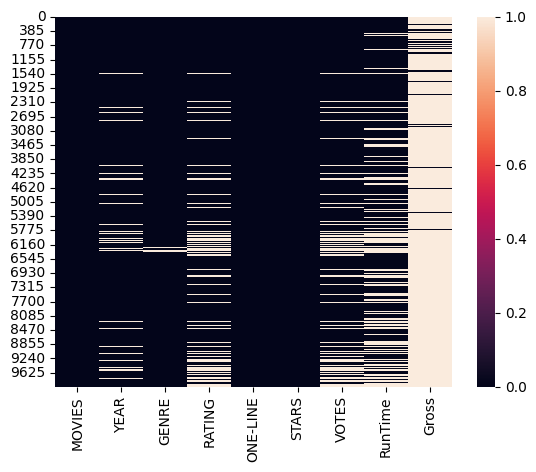

In [1240]:
sns.heatmap(df.isnull())

In [1241]:
percentnull = df.isnull().sum()*100/len(df)
percentnull

MOVIES       0.000000
YEAR         6.440644
GENRE        0.800080
RATING      18.201820
ONE-LINE     0.000000
STARS        0.000000
VOTES       18.201820
RunTime     29.582958
Gross       95.399540
dtype: float64

In [1242]:
#dropping gross column
df = df.drop('Gross', axis=1)

In [1243]:
df

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN
...,...,...,...,...,...,...,...,...
9994,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",NaN,\nAdd a Plot\n,\n \n Stars:\nMorgan Taylor Camp...,NaN,NaN
9995,Arcane,(2021– ),"\nAnimation, Action, Adventure",NaN,\nAdd a Plot\n,\n,NaN,NaN
9996,Heart of Invictus,(2022– ),"\nDocumentary, Sport",NaN,\nAdd a Plot\n,\n Director:\nOrlando von Einsiedel\n| \n ...,NaN,NaN
9997,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",NaN,\nAdd a Plot\n,\n Director:\nJovanka Vuckovic\n| \n Sta...,NaN,NaN


In [1244]:
#dropping missing values:
df = df.dropna()
df.isnull().sum()

MOVIES      0
YEAR        0
GENRE       0
RATING      0
ONE-LINE    0
STARS       0
VOTES       0
RunTime     0
dtype: int64

In [1245]:
df.columns = df.columns.str.lower()
df

,movies,year,genre,rating,one-line,stars,votes,runtime
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0
5,Outer Banks,(2020– ),"\nAction, Crime, Drama",7.6,\nA group of teenagers from the wrong side of ...,"\n \n Stars:\nChase Stokes, \nMa...","25,858",50.0
...,...,...,...,...,...,...,...,...
9959,Sexify,(2021– ),"\nComedy, Drama",6.8,"\nMonika's idea for gathering data is a hit, b...",\n Director:\nKalina Alabrudzinska\n| \n ...,108,38.0
9960,Sexify,(2021– ),"\nComedy, Drama",7.1,\nAfter facing their parents at Easter breakfa...,\n Director:\nKalina Alabrudzinska\n| \n ...,103,37.0
9961,Sexify,(2021– ),"\nComedy, Drama",6.9,\nAfter getting an anonymous tip about the cop...,\n Director:\nKalina Alabrudzinska\n| \n ...,96,40.0
9962,Sexify,(2021– ),"\nComedy, Drama",7.1,\nThe big pitch at the university tech competi...,\n Director:\nKalina Alabrudzinska\n| \n ...,100,47.0


In [1246]:
df.columns = df.columns.str.strip()

In [1247]:
duplicates = df.duplicated().any()
duplicates 

False

In [1248]:
duplicates = df['movies'].duplicated().sum()
duplicates 

1624

In [1249]:
df = df.drop_duplicates(subset='movies')

In [1250]:
df.describe(include='all')

,movies,year,genre,rating,one-line,stars,votes,runtime
count,5155,5155,5155,5155.000000,5155,5155,5155,5155.000000
unique,5155,397,465,NaN,5083,5080,3689,NaN
top,Blood Red Sky,(2020),\nComedy,NaN,\nAdd a Plot\n,\n,82,NaN
freq,1,417,541,NaN,72,29,10,NaN
mean,NaN,NaN,NaN,6.606246,NaN,NaN,NaN,79.088652
std,NaN,NaN,NaN,1.218769,NaN,NaN,NaN,49.680740
min,NaN,NaN,NaN,1.100000,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,5.900000,NaN,NaN,NaN,46.000000
50%,NaN,NaN,NaN,6.700000,NaN,NaN,NaN,83.000000
75%,NaN,NaN,NaN,7.500000,NaN,NaN,NaN,100.000000


In [1251]:
df['year'] =df['year'].str.replace('(','')
df['year'] =df['year'].str.replace(')','')
df['year'] =df['year'].str.strip()
df

,movies,year,genre,rating,one-line,stars,votes,runtime
0,Blood Red Sky,2021,"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0
1,Masters of the Universe: Revelation,2021–,"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0
2,The Walking Dead,2010–2022,"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0
3,Rick and Morty,2013–,"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0
5,Outer Banks,2020–,"\nAction, Crime, Drama",7.6,\nA group of teenagers from the wrong side of ...,"\n \n Stars:\nChase Stokes, \nMa...","25,858",50.0
...,...,...,...,...,...,...,...,...
9805,Katla,2021–,"\nDrama, Mystery, Sci-Fi",7.5,"\nA year after Katla's eruption, the shattered...",\n Director:\nBaltasar Kormákur\n| \n St...,453,51.0
9814,This Is a Robbery: The World's Biggest Art Heist,2021,"\nDocumentary, Crime, History",7.3,\nA museum guard buzzes in two men dressed as ...,\n Director:\nColin Barnicle\n| \n Stars...,175,53.0
9901,Modern Family,2009–2020,"\nComedy, Drama, Romance",8.2,"\nJay must adapt to his young new wife, Gloria...",\n Director:\nJason Winer\n| \n Stars:\n...,"3,404",23.0
9934,Master of None,2015–,"\nComedy, Drama",5.8,"\nNow a bestselling author, Denise leads a qui...",\n Director:\nAziz Ansari\n| \n Stars:\n...,"1,173",55.0


In [1252]:
filtered_df = df[df['year'].str.len() == 5]
filtered_df

,movies,year,genre,rating,one-line,stars,votes,runtime
1,Masters of the Universe: Revelation,2021–,"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0
3,Rick and Morty,2013–,"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0
5,Outer Banks,2020–,"\nAction, Crime, Drama",7.6,\nA group of teenagers from the wrong side of ...,"\n \n Stars:\nChase Stokes, \nMa...","25,858",50.0
8,Never Have I Ever,2020–,\nComedy,7.9,\nThe complicated life of a modern-day first g...,\n \n Stars:\nMaitreyi Ramakrish...,"34,530",30.0
9,Virgin River,2019–,"\nDrama, Romance",7.4,"\nSeeking a fresh start, nurse practitioner Me...",\n \n Stars:\nAlexandra Breckenr...,"27,279",44.0
...,...,...,...,...,...,...,...,...
9789,Magic for Humans by Mago Pop,2021–,"\nComedy, Reality-TV",7.0,\nAdd a Plot\n,"\n \n Stars:\nAntonio Díaz, \nCr...",9,23.0
9796,Shûmatsu no Valkyrie,2021–,"\nAnimation, Action, Adventure",6.8,"\nAt the Council of Valhalla, the gods vote un...",\n Director:\nMasao Ôkubo\n| \n Stars:\n...,220,24.0
9805,Katla,2021–,"\nDrama, Mystery, Sci-Fi",7.5,"\nA year after Katla's eruption, the shattered...",\n Director:\nBaltasar Kormákur\n| \n St...,453,51.0
9934,Master of None,2015–,"\nComedy, Drama",5.8,"\nNow a bestselling author, Denise leads a qui...",\n Director:\nAziz Ansari\n| \n Stars:\n...,"1,173",55.0


In [1253]:
df.loc[df['year'].str.len() == 5, 'year'] = df.loc[df['year'].str.len() == 5, 'year'].str.replace('–', '')
df

,movies,year,genre,rating,one-line,stars,votes,runtime
0,Blood Red Sky,2021,"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0
1,Masters of the Universe: Revelation,2021,"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0
2,The Walking Dead,2010–2022,"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0
3,Rick and Morty,2013,"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0
5,Outer Banks,2020,"\nAction, Crime, Drama",7.6,\nA group of teenagers from the wrong side of ...,"\n \n Stars:\nChase Stokes, \nMa...","25,858",50.0
...,...,...,...,...,...,...,...,...
9805,Katla,2021,"\nDrama, Mystery, Sci-Fi",7.5,"\nA year after Katla's eruption, the shattered...",\n Director:\nBaltasar Kormákur\n| \n St...,453,51.0
9814,This Is a Robbery: The World's Biggest Art Heist,2021,"\nDocumentary, Crime, History",7.3,\nA museum guard buzzes in two men dressed as ...,\n Director:\nColin Barnicle\n| \n Stars...,175,53.0
9901,Modern Family,2009–2020,"\nComedy, Drama, Romance",8.2,"\nJay must adapt to his young new wife, Gloria...",\n Director:\nJason Winer\n| \n Stars:\n...,"3,404",23.0
9934,Master of None,2015,"\nComedy, Drama",5.8,"\nNow a bestselling author, Denise leads a qui...",\n Director:\nAziz Ansari\n| \n Stars:\n...,"1,173",55.0


In [1254]:
df['year'] =df['year'].str.replace('I','')
df['year'] =df['year'].str.replace('II','')
df['year'] =df['year'].str.replace('VI','')
df['year'] =df['year'].str.replace('V','')
df['year'] =df['year'].str.replace('X','')
df

,movies,year,genre,rating,one-line,stars,votes,runtime
0,Blood Red Sky,2021,"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0
1,Masters of the Universe: Revelation,2021,"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0
2,The Walking Dead,2010–2022,"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0
3,Rick and Morty,2013,"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0
5,Outer Banks,2020,"\nAction, Crime, Drama",7.6,\nA group of teenagers from the wrong side of ...,"\n \n Stars:\nChase Stokes, \nMa...","25,858",50.0
...,...,...,...,...,...,...,...,...
9805,Katla,2021,"\nDrama, Mystery, Sci-Fi",7.5,"\nA year after Katla's eruption, the shattered...",\n Director:\nBaltasar Kormákur\n| \n St...,453,51.0
9814,This Is a Robbery: The World's Biggest Art Heist,2021,"\nDocumentary, Crime, History",7.3,\nA museum guard buzzes in two men dressed as ...,\n Director:\nColin Barnicle\n| \n Stars...,175,53.0
9901,Modern Family,2009–2020,"\nComedy, Drama, Romance",8.2,"\nJay must adapt to his young new wife, Gloria...",\n Director:\nJason Winer\n| \n Stars:\n...,"3,404",23.0
9934,Master of None,2015,"\nComedy, Drama",5.8,"\nNow a bestselling author, Denise leads a qui...",\n Director:\nAziz Ansari\n| \n Stars:\n...,"1,173",55.0


In [1255]:
df['genre']= df['genre'].str.replace('\n','')

In [1256]:
df['one-line']=df['one-line'].str.replace('\n','')
df

,movies,year,genre,rating,one-line,stars,votes,runtime
0,Blood Red Sky,2021,"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0
1,Masters of the Universe: Revelation,2021,"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0
2,The Walking Dead,2010–2022,"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0
3,Rick and Morty,2013,"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0
5,Outer Banks,2020,"Action, Crime, Drama",7.6,A group of teenagers from the wrong side of th...,"\n \n Stars:\nChase Stokes, \nMa...","25,858",50.0
...,...,...,...,...,...,...,...,...
9805,Katla,2021,"Drama, Mystery, Sci-Fi",7.5,"A year after Katla's eruption, the shattered s...",\n Director:\nBaltasar Kormákur\n| \n St...,453,51.0
9814,This Is a Robbery: The World's Biggest Art Heist,2021,"Documentary, Crime, History",7.3,A museum guard buzzes in two men dressed as co...,\n Director:\nColin Barnicle\n| \n Stars...,175,53.0
9901,Modern Family,2009–2020,"Comedy, Drama, Romance",8.2,"Jay must adapt to his young new wife, Gloria a...",\n Director:\nJason Winer\n| \n Stars:\n...,"3,404",23.0
9934,Master of None,2015,"Comedy, Drama",5.8,"Now a bestselling author, Denise leads a quiet...",\n Director:\nAziz Ansari\n| \n Stars:\n...,"1,173",55.0


In [1257]:
df['stars']

0       \n    Director:\nPeter Thorwarth\n| \n    Star...
1       \n            \n    Stars:\nChris Wood, \nSara...
2       \n            \n    Stars:\nAndrew Lincoln, \n...
3       \n            \n    Stars:\nJustin Roiland, \n...
5       \n            \n    Stars:\nChase Stokes, \nMa...
                              ...                        
9805    \n    Director:\nBaltasar Kormákur\n| \n    St...
9814    \n    Director:\nColin Barnicle\n| \n    Stars...
9901    \n    Director:\nJason Winer\n| \n    Stars:\n...
9934    \n    Director:\nAziz Ansari\n| \n    Stars:\n...
9956    \n    Director:\nPiotr Domalewski\n| \n    Sta...
Name: stars, Length: 5155, dtype: object

In [1258]:
df['stars'].str.split('|',n=1)

0       [\n    Director:\nPeter Thorwarth\n,  \n    St...
1       [\n            \n    Stars:\nChris Wood, \nSar...
2       [\n            \n    Stars:\nAndrew Lincoln, \...
3       [\n            \n    Stars:\nJustin Roiland, \...
5       [\n            \n    Stars:\nChase Stokes, \nM...
                              ...                        
9805    [\n    Director:\nBaltasar Kormákur\n,  \n    ...
9814    [\n    Director:\nColin Barnicle\n,  \n    Sta...
9901    [\n    Director:\nJason Winer\n,  \n    Stars:...
9934    [\n    Director:\nAziz Ansari\n,  \n    Stars:...
9956    [\n    Director:\nPiotr Domalewski\n,  \n    S...
Name: stars, Length: 5155, dtype: object

In [1259]:
df['stars'].str.split('Stars', n=1, expand=True)

,0,1
0,\n Director:\nPeter Thorwarth\n| \n,":\nPeri Baumeister, \nCarl Anton Koch, \nAlexa..."
1,\n \n,":\nChris Wood, \nSarah Michelle Gellar, \nLena..."
2,\n \n,":\nAndrew Lincoln, \nNorman Reedus, \nMelissa ..."
3,\n \n,":\nJustin Roiland, \nChris Parnell, \nSpencer ..."
5,\n \n,":\nChase Stokes, \nMadelyn Cline, \nMadison Ba..."
...,...,...
9805,\n Director:\nBaltasar Kormákur\n| \n,":\nGuðrún Ýr Eyfjörð, \nÍris Tanja Flygenring,..."
9814,\n Director:\nColin Barnicle\n| \n,":\nNancy Clougherty, \nJustin Stratman, \nAnne..."
9901,\n Director:\nJason Winer\n| \n,":\nEd O'Neill, \nSofía Vergara, \nJulie Bowen,..."
9934,\n Director:\nAziz Ansari\n| \n,":\nNaomi Ackie, \nLena Waithe, \nAziz Ansari, ..."


In [1260]:
df['stars'].str.split('Stars', n=1, expand=True)
df.rename(columns={0:'directors',1:'starsonly'})
df

,movies,year,genre,rating,one-line,stars,votes,runtime
0,Blood Red Sky,2021,"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0
1,Masters of the Universe: Revelation,2021,"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0
2,The Walking Dead,2010–2022,"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0
3,Rick and Morty,2013,"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0
5,Outer Banks,2020,"Action, Crime, Drama",7.6,A group of teenagers from the wrong side of th...,"\n \n Stars:\nChase Stokes, \nMa...","25,858",50.0
...,...,...,...,...,...,...,...,...
9805,Katla,2021,"Drama, Mystery, Sci-Fi",7.5,"A year after Katla's eruption, the shattered s...",\n Director:\nBaltasar Kormákur\n| \n St...,453,51.0
9814,This Is a Robbery: The World's Biggest Art Heist,2021,"Documentary, Crime, History",7.3,A museum guard buzzes in two men dressed as co...,\n Director:\nColin Barnicle\n| \n Stars...,175,53.0
9901,Modern Family,2009–2020,"Comedy, Drama, Romance",8.2,"Jay must adapt to his young new wife, Gloria a...",\n Director:\nJason Winer\n| \n Stars:\n...,"3,404",23.0
9934,Master of None,2015,"Comedy, Drama",5.8,"Now a bestselling author, Denise leads a quiet...",\n Director:\nAziz Ansari\n| \n Stars:\n...,"1,173",55.0


In [1261]:
splitdata2 = df['stars'].str.split('Star', n=1, expand=True).rename(columns={0:'directors',1:'starsonly'})
splitdata2 

,directors,starsonly
0,\n Director:\nPeter Thorwarth\n| \n,"s:\nPeri Baumeister, \nCarl Anton Koch, \nAlex..."
1,\n \n,"s:\nChris Wood, \nSarah Michelle Gellar, \nLen..."
2,\n \n,"s:\nAndrew Lincoln, \nNorman Reedus, \nMelissa..."
3,\n \n,"s:\nJustin Roiland, \nChris Parnell, \nSpencer..."
5,\n \n,"s:\nChase Stokes, \nMadelyn Cline, \nMadison B..."
...,...,...
9805,\n Director:\nBaltasar Kormákur\n| \n,"s:\nGuðrún Ýr Eyfjörð, \nÍris Tanja Flygenring..."
9814,\n Director:\nColin Barnicle\n| \n,"s:\nNancy Clougherty, \nJustin Stratman, \nAnn..."
9901,\n Director:\nJason Winer\n| \n,"s:\nEd O'Neill, \nSofía Vergara, \nJulie Bowen..."
9934,\n Director:\nAziz Ansari\n| \n,"s:\nNaomi Ackie, \nLena Waithe, \nAziz Ansari,..."


In [1262]:
#spliting director and stars  into separate columns
df[['directors', 'starsonly']] = df['stars'].str.split('Star', n=1, expand=True)
df

,movies,year,genre,rating,one-line,stars,votes,runtime,directors,starsonly
0,Blood Red Sky,2021,"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,\n Director:\nPeter Thorwarth\n| \n,"s:\nPeri Baumeister, \nCarl Anton Koch, \nAlex..."
1,Masters of the Universe: Revelation,2021,"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,\n \n,"s:\nChris Wood, \nSarah Michelle Gellar, \nLen..."
2,The Walking Dead,2010–2022,"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,\n \n,"s:\nAndrew Lincoln, \nNorman Reedus, \nMelissa..."
3,Rick and Morty,2013,"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,\n \n,"s:\nJustin Roiland, \nChris Parnell, \nSpencer..."
5,Outer Banks,2020,"Action, Crime, Drama",7.6,A group of teenagers from the wrong side of th...,"\n \n Stars:\nChase Stokes, \nMa...","25,858",50.0,\n \n,"s:\nChase Stokes, \nMadelyn Cline, \nMadison B..."
...,...,...,...,...,...,...,...,...,...,...
9805,Katla,2021,"Drama, Mystery, Sci-Fi",7.5,"A year after Katla's eruption, the shattered s...",\n Director:\nBaltasar Kormákur\n| \n St...,453,51.0,\n Director:\nBaltasar Kormákur\n| \n,"s:\nGuðrún Ýr Eyfjörð, \nÍris Tanja Flygenring..."
9814,This Is a Robbery: The World's Biggest Art Heist,2021,"Documentary, Crime, History",7.3,A museum guard buzzes in two men dressed as co...,\n Director:\nColin Barnicle\n| \n Stars...,175,53.0,\n Director:\nColin Barnicle\n| \n,"s:\nNancy Clougherty, \nJustin Stratman, \nAnn..."
9901,Modern Family,2009–2020,"Comedy, Drama, Romance",8.2,"Jay must adapt to his young new wife, Gloria a...",\n Director:\nJason Winer\n| \n Stars:\n...,"3,404",23.0,\n Director:\nJason Winer\n| \n,"s:\nEd O'Neill, \nSofía Vergara, \nJulie Bowen..."
9934,Master of None,2015,"Comedy, Drama",5.8,"Now a bestselling author, Denise leads a quiet...",\n Director:\nAziz Ansari\n| \n Stars:\n...,"1,173",55.0,\n Director:\nAziz Ansari\n| \n,"s:\nNaomi Ackie, \nLena Waithe, \nAziz Ansari,..."


In [1263]:
#
df['directors'] = df['directors'].replace(r'\n \n', '–', regex=True)
df['directors'] = df['directors'].replace(r'Director:', '–', regex=True)
df['directors'] = df['directors'].replace(r'-', '', regex=True)
df['directors'] = df['directors'].replace(r',|,', '', regex=True)
df

,movies,year,genre,rating,one-line,stars,votes,runtime,directors,starsonly
0,Blood Red Sky,2021,"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,\n –\nPeter Thorwarth\n| \n,"s:\nPeri Baumeister, \nCarl Anton Koch, \nAlex..."
1,Masters of the Universe: Revelation,2021,"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,\n \n,"s:\nChris Wood, \nSarah Michelle Gellar, \nLen..."
2,The Walking Dead,2010–2022,"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,\n \n,"s:\nAndrew Lincoln, \nNorman Reedus, \nMelissa..."
3,Rick and Morty,2013,"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,\n \n,"s:\nJustin Roiland, \nChris Parnell, \nSpencer..."
5,Outer Banks,2020,"Action, Crime, Drama",7.6,A group of teenagers from the wrong side of th...,"\n \n Stars:\nChase Stokes, \nMa...","25,858",50.0,\n \n,"s:\nChase Stokes, \nMadelyn Cline, \nMadison B..."
...,...,...,...,...,...,...,...,...,...,...
9805,Katla,2021,"Drama, Mystery, Sci-Fi",7.5,"A year after Katla's eruption, the shattered s...",\n Director:\nBaltasar Kormákur\n| \n St...,453,51.0,\n –\nBaltasar Kormákur\n| \n,"s:\nGuðrún Ýr Eyfjörð, \nÍris Tanja Flygenring..."
9814,This Is a Robbery: The World's Biggest Art Heist,2021,"Documentary, Crime, History",7.3,A museum guard buzzes in two men dressed as co...,\n Director:\nColin Barnicle\n| \n Stars...,175,53.0,\n –\nColin Barnicle\n| \n,"s:\nNancy Clougherty, \nJustin Stratman, \nAnn..."
9901,Modern Family,2009–2020,"Comedy, Drama, Romance",8.2,"Jay must adapt to his young new wife, Gloria a...",\n Director:\nJason Winer\n| \n Stars:\n...,"3,404",23.0,\n –\nJason Winer\n| \n,"s:\nEd O'Neill, \nSofía Vergara, \nJulie Bowen..."
9934,Master of None,2015,"Comedy, Drama",5.8,"Now a bestselling author, Denise leads a quiet...",\n Director:\nAziz Ansari\n| \n Stars:\n...,"1,173",55.0,\n –\nAziz Ansari\n| \n,"s:\nNaomi Ackie, \nLena Waithe, \nAziz Ansari,..."


In [1264]:
df['starsonly'] = df['starsonly'].replace(r's:\n', '-', regex=True)
df['starsonly'] = df['starsonly'].replace(r'\n', '-', regex=True)
df

,movies,year,genre,rating,one-line,stars,votes,runtime,directors,starsonly
0,Blood Red Sky,2021,"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,\n –\nPeter Thorwarth\n| \n,"-Peri Baumeister, -Carl Anton Koch, -Alexander..."
1,Masters of the Universe: Revelation,2021,"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,\n \n,"-Chris Wood, -Sarah Michelle Gellar, -Lena Hea..."
2,The Walking Dead,2010–2022,"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,\n \n,"-Andrew Lincoln, -Norman Reedus, -Melissa McBr..."
3,Rick and Morty,2013,"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,\n \n,"-Justin Roiland, -Chris Parnell, -Spencer Gram..."
5,Outer Banks,2020,"Action, Crime, Drama",7.6,A group of teenagers from the wrong side of th...,"\n \n Stars:\nChase Stokes, \nMa...","25,858",50.0,\n \n,"-Chase Stokes, -Madelyn Cline, -Madison Bailey..."
...,...,...,...,...,...,...,...,...,...,...
9805,Katla,2021,"Drama, Mystery, Sci-Fi",7.5,"A year after Katla's eruption, the shattered s...",\n Director:\nBaltasar Kormákur\n| \n St...,453,51.0,\n –\nBaltasar Kormákur\n| \n,"-Guðrún Ýr Eyfjörð, -Íris Tanja Flygenring, -I..."
9814,This Is a Robbery: The World's Biggest Art Heist,2021,"Documentary, Crime, History",7.3,A museum guard buzzes in two men dressed as co...,\n Director:\nColin Barnicle\n| \n Stars...,175,53.0,\n –\nColin Barnicle\n| \n,"-Nancy Clougherty, -Justin Stratman, -Anne Haw..."
9901,Modern Family,2009–2020,"Comedy, Drama, Romance",8.2,"Jay must adapt to his young new wife, Gloria a...",\n Director:\nJason Winer\n| \n Stars:\n...,"3,404",23.0,\n –\nJason Winer\n| \n,"-Ed O'Neill, -Sofía Vergara, -Julie Bowen, -Ty..."
9934,Master of None,2015,"Comedy, Drama",5.8,"Now a bestselling author, Denise leads a quiet...",\n Director:\nAziz Ansari\n| \n Stars:\n...,"1,173",55.0,\n –\nAziz Ansari\n| \n,"-Naomi Ackie, -Lena Waithe, -Aziz Ansari, -Ays..."


## Display the title of movie having run time >= 120 mins

In [1265]:
df[df['runtime'] >= 120]['movies']

0                                           Blood Red Sky
25                                              Chernobyl
49                                       Army of the Dead
60                                     The Queen's Gambit
85                                          Jurassic Park
                              ...                        
6077                        Najib Amhali: Alles komt goed
6105                              Nietzsche and the Nazis
6124                                             The Plan
6147               Najib Amhali: The Best of Najib Amhali
6430    Ancient Extraterrestrials: Aliens and UFOs Bef...
Name: movies, Length: 492, dtype: object

In [1266]:
highruntime = df[df['runtime'] >= 120]
highruntime.sort_values(by= ['runtime'],ascending=[False])


,movies,year,genre,rating,one-line,stars,votes,runtime,directors,starsonly
1902,El tiempo entre costuras,2013–2014,"Adventure, Drama, History",8.3,Sira Quiroga is a young Spanish dressmaker eng...,"\n \n Stars:\nAdriana Ugarte, \n...","3,876",853.0,\n \n,"-Adriana Ugarte, -Mari Carmen Sánchez, -Tristá..."
1081,Soupçons,2004–2018,"Documentary, Crime, Drama",7.9,The high-profile murder trial of American nove...,"\n \n Stars:\nMichael Peterson, ...","20,200",629.0,\n \n,"-Michael Peterson, -David Rudolf, -Ron Guerett..."
2498,The Innocence Files,2020,"Documentary, Crime",8.0,Cases of wrongful conviction that the Innocenc...,"\n \n Stars:\nPeter Neufeld, \nB...","2,335",573.0,\n \n,"-Peter Neufeld, -Barry Scheck, -Michael West, ..."
201,The Haunting of Hill House,2018,"Drama, Horror, Mystery",8.6,"Flashing between past and present, a fractured...","\n \n Stars:\nMichiel Huisman, \...","195,117",572.0,\n \n,"-Michiel Huisman, -Carla Gugino, -Henry Thomas..."
820,Cosmos: A Spacetime Odyssey,2014,Documentary,9.3,An exploration of our discovery of the laws of...,\n \n Stars:\nNeil deGrasse Tyso...,"114,386",557.0,\n \n,"-Neil deGrasse Tyson, -Stoney Emshwiller, -Pio..."
...,...,...,...,...,...,...,...,...,...,...
2139,Hou lai de wo men,2018,"Drama, Romance",7.4,"During the hectic chunyun period, 2 strangers ...",\n Director:\nRene Liu\n| \n Stars:\nBor...,"3,425",120.0,\n –\nRene Liu\n| \n,"-Boran Jing, -Dongyu Zhou, -Zhuangzhuang Tian,..."
4612,Babies Behind Bars,2011 T Movie,Documentary,6.2,"Follows pregnancy and birth in prison, includi...",\n Director:\nAmanda Richardson\n| \n St...,110,120.0,\n –\nAmanda Richardson\n| \n,"-Lesley Sharp, -Bobi Brush, -Mary Bullock, -Pa..."
2528,Gekijouban Fate/Stay Night: Heaven's Feel - I....,2017,"Animation, Action, Drama",7.5,Movie adaptation of the third route of Fate/St...,\n Director:\nTomonori Sudô\n| \n Stars:...,"2,147",120.0,\n –\nTomonori Sudô\n| \n,"-Bryce Papenbrook, -Noriaki Sugiyama, -Noriko ..."
2566,Chemi Bednieri Ojakhi,2017,Drama,7.4,"In a patriarchal society, an ordinary Georgian...","\n Directors:\nNana Ekvtimishvili, \nSimon ...","3,482",120.0,\n Directors:\nNana Ekvtimishvili \nSimon G...,"-Ia Shugliashvili, -Merab Ninidze, -Berta Khap..."


In [1267]:
df['votes'].isna().sum()

0

In [1268]:
df['votes'].fillna(0, inplace=True)
df

,movies,year,genre,rating,one-line,stars,votes,runtime,directors,starsonly
0,Blood Red Sky,2021,"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,\n –\nPeter Thorwarth\n| \n,"-Peri Baumeister, -Carl Anton Koch, -Alexander..."
1,Masters of the Universe: Revelation,2021,"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,\n \n,"-Chris Wood, -Sarah Michelle Gellar, -Lena Hea..."
2,The Walking Dead,2010–2022,"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,\n \n,"-Andrew Lincoln, -Norman Reedus, -Melissa McBr..."
3,Rick and Morty,2013,"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,\n \n,"-Justin Roiland, -Chris Parnell, -Spencer Gram..."
5,Outer Banks,2020,"Action, Crime, Drama",7.6,A group of teenagers from the wrong side of th...,"\n \n Stars:\nChase Stokes, \nMa...","25,858",50.0,\n \n,"-Chase Stokes, -Madelyn Cline, -Madison Bailey..."
...,...,...,...,...,...,...,...,...,...,...
9805,Katla,2021,"Drama, Mystery, Sci-Fi",7.5,"A year after Katla's eruption, the shattered s...",\n Director:\nBaltasar Kormákur\n| \n St...,453,51.0,\n –\nBaltasar Kormákur\n| \n,"-Guðrún Ýr Eyfjörð, -Íris Tanja Flygenring, -I..."
9814,This Is a Robbery: The World's Biggest Art Heist,2021,"Documentary, Crime, History",7.3,A museum guard buzzes in two men dressed as co...,\n Director:\nColin Barnicle\n| \n Stars...,175,53.0,\n –\nColin Barnicle\n| \n,"-Nancy Clougherty, -Justin Stratman, -Anne Haw..."
9901,Modern Family,2009–2020,"Comedy, Drama, Romance",8.2,"Jay must adapt to his young new wife, Gloria a...",\n Director:\nJason Winer\n| \n Stars:\n...,"3,404",23.0,\n –\nJason Winer\n| \n,"-Ed O'Neill, -Sofía Vergara, -Julie Bowen, -Ty..."
9934,Master of None,2015,"Comedy, Drama",5.8,"Now a bestselling author, Denise leads a quiet...",\n Director:\nAziz Ansari\n| \n Stars:\n...,"1,173",55.0,\n –\nAziz Ansari\n| \n,"-Naomi Ackie, -Lena Waithe, -Aziz Ansari, -Ays..."


In [1269]:
df['votes'] = df['votes'].str.replace(',', '')

In [1270]:
df['votes'] = df['votes'].astype('int64')
df

,movies,year,genre,rating,one-line,stars,votes,runtime,directors,starsonly
0,Blood Red Sky,2021,"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,\n Director:\nPeter Thorwarth\n| \n Star...,21062,121.0,\n –\nPeter Thorwarth\n| \n,"-Peri Baumeister, -Carl Anton Koch, -Alexander..."
1,Masters of the Universe: Revelation,2021,"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,"\n \n Stars:\nChris Wood, \nSara...",17870,25.0,\n \n,"-Chris Wood, -Sarah Michelle Gellar, -Lena Hea..."
2,The Walking Dead,2010–2022,"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"\n \n Stars:\nAndrew Lincoln, \n...",885805,44.0,\n \n,"-Andrew Lincoln, -Norman Reedus, -Melissa McBr..."
3,Rick and Morty,2013,"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"\n \n Stars:\nJustin Roiland, \n...",414849,23.0,\n \n,"-Justin Roiland, -Chris Parnell, -Spencer Gram..."
5,Outer Banks,2020,"Action, Crime, Drama",7.6,A group of teenagers from the wrong side of th...,"\n \n Stars:\nChase Stokes, \nMa...",25858,50.0,\n \n,"-Chase Stokes, -Madelyn Cline, -Madison Bailey..."
...,...,...,...,...,...,...,...,...,...,...
9805,Katla,2021,"Drama, Mystery, Sci-Fi",7.5,"A year after Katla's eruption, the shattered s...",\n Director:\nBaltasar Kormákur\n| \n St...,453,51.0,\n –\nBaltasar Kormákur\n| \n,"-Guðrún Ýr Eyfjörð, -Íris Tanja Flygenring, -I..."
9814,This Is a Robbery: The World's Biggest Art Heist,2021,"Documentary, Crime, History",7.3,A museum guard buzzes in two men dressed as co...,\n Director:\nColin Barnicle\n| \n Stars...,175,53.0,\n –\nColin Barnicle\n| \n,"-Nancy Clougherty, -Justin Stratman, -Anne Haw..."
9901,Modern Family,2009–2020,"Comedy, Drama, Romance",8.2,"Jay must adapt to his young new wife, Gloria a...",\n Director:\nJason Winer\n| \n Stars:\n...,3404,23.0,\n –\nJason Winer\n| \n,"-Ed O'Neill, -Sofía Vergara, -Julie Bowen, -Ty..."
9934,Master of None,2015,"Comedy, Drama",5.8,"Now a bestselling author, Denise leads a quiet...",\n Director:\nAziz Ansari\n| \n Stars:\n...,1173,55.0,\n –\nAziz Ansari\n| \n,"-Naomi Ackie, -Lena Waithe, -Aziz Ansari, -Ays..."


In [1271]:
df[['year', 'endyearseries']] = df['year'].str.split('–', n=1, expand=True).rename(columns={0:'year', 1:'endyearseries'})
df

,movies,year,genre,rating,one-line,stars,votes,runtime,directors,starsonly,endyearseries
0,Blood Red Sky,2021,"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,\n Director:\nPeter Thorwarth\n| \n Star...,21062,121.0,\n –\nPeter Thorwarth\n| \n,"-Peri Baumeister, -Carl Anton Koch, -Alexander...",None
1,Masters of the Universe: Revelation,2021,"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,"\n \n Stars:\nChris Wood, \nSara...",17870,25.0,\n \n,"-Chris Wood, -Sarah Michelle Gellar, -Lena Hea...",None
2,The Walking Dead,2010,"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"\n \n Stars:\nAndrew Lincoln, \n...",885805,44.0,\n \n,"-Andrew Lincoln, -Norman Reedus, -Melissa McBr...",2022
3,Rick and Morty,2013,"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"\n \n Stars:\nJustin Roiland, \n...",414849,23.0,\n \n,"-Justin Roiland, -Chris Parnell, -Spencer Gram...",None
5,Outer Banks,2020,"Action, Crime, Drama",7.6,A group of teenagers from the wrong side of th...,"\n \n Stars:\nChase Stokes, \nMa...",25858,50.0,\n \n,"-Chase Stokes, -Madelyn Cline, -Madison Bailey...",None
...,...,...,...,...,...,...,...,...,...,...,...
9805,Katla,2021,"Drama, Mystery, Sci-Fi",7.5,"A year after Katla's eruption, the shattered s...",\n Director:\nBaltasar Kormákur\n| \n St...,453,51.0,\n –\nBaltasar Kormákur\n| \n,"-Guðrún Ýr Eyfjörð, -Íris Tanja Flygenring, -I...",None
9814,This Is a Robbery: The World's Biggest Art Heist,2021,"Documentary, Crime, History",7.3,A museum guard buzzes in two men dressed as co...,\n Director:\nColin Barnicle\n| \n Stars...,175,53.0,\n –\nColin Barnicle\n| \n,"-Nancy Clougherty, -Justin Stratman, -Anne Haw...",None
9901,Modern Family,2009,"Comedy, Drama, Romance",8.2,"Jay must adapt to his young new wife, Gloria a...",\n Director:\nJason Winer\n| \n Stars:\n...,3404,23.0,\n –\nJason Winer\n| \n,"-Ed O'Neill, -Sofía Vergara, -Julie Bowen, -Ty...",2020
9934,Master of None,2015,"Comedy, Drama",5.8,"Now a bestselling author, Denise leads a quiet...",\n Director:\nAziz Ansari\n| \n Stars:\n...,1173,55.0,\n –\nAziz Ansari\n| \n,"-Naomi Ackie, -Lena Waithe, -Aziz Ansari, -Ays...",None


In [1272]:
df['year'] = df['year'].str.replace('T Short', '')
df['year'] = df['year'].str.replace('ideo', '')
df['year'] = df['year'].str.replace('T Special', '')
df['year'] = df['year'].str.replace('T Movie', '')

In [1273]:
df['year'] = df['year'].astype('int64')

In [1274]:
df['endyearseries'] = df['endyearseries'].where(~df['endyearseries'].isna(), 0)
df

,movies,year,genre,rating,one-line,stars,votes,runtime,directors,starsonly,endyearseries
0,Blood Red Sky,2021,"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,\n Director:\nPeter Thorwarth\n| \n Star...,21062,121.0,\n –\nPeter Thorwarth\n| \n,"-Peri Baumeister, -Carl Anton Koch, -Alexander...",0
1,Masters of the Universe: Revelation,2021,"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,"\n \n Stars:\nChris Wood, \nSara...",17870,25.0,\n \n,"-Chris Wood, -Sarah Michelle Gellar, -Lena Hea...",0
2,The Walking Dead,2010,"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"\n \n Stars:\nAndrew Lincoln, \n...",885805,44.0,\n \n,"-Andrew Lincoln, -Norman Reedus, -Melissa McBr...",2022
3,Rick and Morty,2013,"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"\n \n Stars:\nJustin Roiland, \n...",414849,23.0,\n \n,"-Justin Roiland, -Chris Parnell, -Spencer Gram...",0
5,Outer Banks,2020,"Action, Crime, Drama",7.6,A group of teenagers from the wrong side of th...,"\n \n Stars:\nChase Stokes, \nMa...",25858,50.0,\n \n,"-Chase Stokes, -Madelyn Cline, -Madison Bailey...",0
...,...,...,...,...,...,...,...,...,...,...,...
9805,Katla,2021,"Drama, Mystery, Sci-Fi",7.5,"A year after Katla's eruption, the shattered s...",\n Director:\nBaltasar Kormákur\n| \n St...,453,51.0,\n –\nBaltasar Kormákur\n| \n,"-Guðrún Ýr Eyfjörð, -Íris Tanja Flygenring, -I...",0
9814,This Is a Robbery: The World's Biggest Art Heist,2021,"Documentary, Crime, History",7.3,A museum guard buzzes in two men dressed as co...,\n Director:\nColin Barnicle\n| \n Stars...,175,53.0,\n –\nColin Barnicle\n| \n,"-Nancy Clougherty, -Justin Stratman, -Anne Haw...",0
9901,Modern Family,2009,"Comedy, Drama, Romance",8.2,"Jay must adapt to his young new wife, Gloria a...",\n Director:\nJason Winer\n| \n Stars:\n...,3404,23.0,\n –\nJason Winer\n| \n,"-Ed O'Neill, -Sofía Vergara, -Julie Bowen, -Ty...",2020
9934,Master of None,2015,"Comedy, Drama",5.8,"Now a bestselling author, Denise leads a quiet...",\n Director:\nAziz Ansari\n| \n Stars:\n...,1173,55.0,\n –\nAziz Ansari\n| \n,"-Naomi Ackie, -Lena Waithe, -Aziz Ansari, -Ays...",0


In [1275]:
df['endyearseries'] = df['endyearseries'].replace('', 0).astype('int64')

In [1276]:
df.groupby('year')['votes'].mean().sort_values(ascending=[False])

year
1976    376432.000000
1968    331717.000000
1962    289098.000000
2003    273000.583333
1975    232547.400000
            ...      
1944       690.000000
1977       361.500000
1953       334.666667
1938        52.000000
1933        36.000000
Name: votes, Length: 76, dtype: float64

In [1277]:
df['endyearseries'].fillna(0, inplace=True)
df

,movies,year,genre,rating,one-line,stars,votes,runtime,directors,starsonly,endyearseries
0,Blood Red Sky,2021,"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,\n Director:\nPeter Thorwarth\n| \n Star...,21062,121.0,\n –\nPeter Thorwarth\n| \n,"-Peri Baumeister, -Carl Anton Koch, -Alexander...",0
1,Masters of the Universe: Revelation,2021,"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,"\n \n Stars:\nChris Wood, \nSara...",17870,25.0,\n \n,"-Chris Wood, -Sarah Michelle Gellar, -Lena Hea...",0
2,The Walking Dead,2010,"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"\n \n Stars:\nAndrew Lincoln, \n...",885805,44.0,\n \n,"-Andrew Lincoln, -Norman Reedus, -Melissa McBr...",2022
3,Rick and Morty,2013,"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"\n \n Stars:\nJustin Roiland, \n...",414849,23.0,\n \n,"-Justin Roiland, -Chris Parnell, -Spencer Gram...",0
5,Outer Banks,2020,"Action, Crime, Drama",7.6,A group of teenagers from the wrong side of th...,"\n \n Stars:\nChase Stokes, \nMa...",25858,50.0,\n \n,"-Chase Stokes, -Madelyn Cline, -Madison Bailey...",0
...,...,...,...,...,...,...,...,...,...,...,...
9805,Katla,2021,"Drama, Mystery, Sci-Fi",7.5,"A year after Katla's eruption, the shattered s...",\n Director:\nBaltasar Kormákur\n| \n St...,453,51.0,\n –\nBaltasar Kormákur\n| \n,"-Guðrún Ýr Eyfjörð, -Íris Tanja Flygenring, -I...",0
9814,This Is a Robbery: The World's Biggest Art Heist,2021,"Documentary, Crime, History",7.3,A museum guard buzzes in two men dressed as co...,\n Director:\nColin Barnicle\n| \n Stars...,175,53.0,\n –\nColin Barnicle\n| \n,"-Nancy Clougherty, -Justin Stratman, -Anne Haw...",0
9901,Modern Family,2009,"Comedy, Drama, Romance",8.2,"Jay must adapt to his young new wife, Gloria a...",\n Director:\nJason Winer\n| \n Stars:\n...,3404,23.0,\n –\nJason Winer\n| \n,"-Ed O'Neill, -Sofía Vergara, -Julie Bowen, -Ty...",2020
9934,Master of None,2015,"Comedy, Drama",5.8,"Now a bestselling author, Denise leads a quiet...",\n Director:\nAziz Ansari\n| \n Stars:\n...,1173,55.0,\n –\nAziz Ansari\n| \n,"-Naomi Ackie, -Lena Waithe, -Aziz Ansari, -Ays...",0


In [1278]:
df.groupby('year')['votes'].mean().sort_values(ascending=[False])

year
1976    376432.000000
1968    331717.000000
1962    289098.000000
2003    273000.583333
1975    232547.400000
            ...      
1944       690.000000
1977       361.500000
1953       334.666667
1938        52.000000
1933        36.000000
Name: votes, Length: 76, dtype: float64

In [1279]:
df.groupby('year')['votes'].mean().sort_values(ascending=[False])

year
1976    376432.000000
1968    331717.000000
1962    289098.000000
2003    273000.583333
1975    232547.400000
            ...      
1944       690.000000
1977       361.500000
1953       334.666667
1938        52.000000
1933        36.000000
Name: votes, Length: 76, dtype: float64

In [1280]:
df['year']

0       2021
1       2021
2       2010
3       2013
5       2020
        ... 
9805    2021
9814    2021
9901    2009
9934    2015
9956    2021
Name: year, Length: 5155, dtype: int64

Text(0.5, 1.0, 'Votes by Year: Top 10')

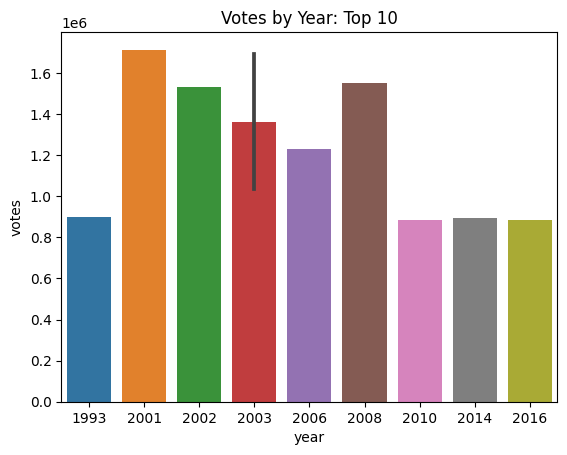

In [1281]:
df_top10 = df.sort_values(by='votes', ascending=False).head(10)
sns.barplot(x='year', y='votes', data=df_top10)
plt.title('Votes by Year: Top 10')

Text(0.5, 1.0, 'Mean votes by Year')

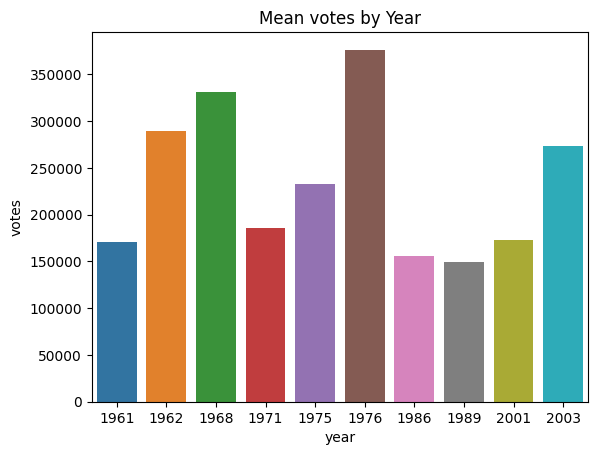

In [1282]:
df_top10 = df.groupby('year')['votes'].mean().sort_values(ascending=False).head(10).to_frame().reset_index()
sns.barplot(x='year', y='votes', data=df_top10)
plt.title('Mean votes by Year')

In [1283]:
df.head()

,movies,year,genre,rating,one-line,stars,votes,runtime,directors,starsonly,endyearseries
0,Blood Red Sky,2021,"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,\n Director:\nPeter Thorwarth\n| \n Star...,21062,121.0,\n –\nPeter Thorwarth\n| \n,"-Peri Baumeister, -Carl Anton Koch, -Alexander...",0
1,Masters of the Universe: Revelation,2021,"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,"\n \n Stars:\nChris Wood, \nSara...",17870,25.0,\n \n,"-Chris Wood, -Sarah Michelle Gellar, -Lena Hea...",0
2,The Walking Dead,2010,"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"\n \n Stars:\nAndrew Lincoln, \n...",885805,44.0,\n \n,"-Andrew Lincoln, -Norman Reedus, -Melissa McBr...",2022
3,Rick and Morty,2013,"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"\n \n Stars:\nJustin Roiland, \n...",414849,23.0,\n \n,"-Justin Roiland, -Chris Parnell, -Spencer Gram...",0
5,Outer Banks,2020,"Action, Crime, Drama",7.6,A group of teenagers from the wrong side of th...,"\n \n Stars:\nChase Stokes, \nMa...",25858,50.0,\n \n,"-Chase Stokes, -Madelyn Cline, -Madison Bailey...",0


In [1284]:
df_rating = df.groupby('year')['rating'].mean().sort_values(ascending=False)
df_rating

year
1962    8.300000
1972    8.200000
1992    8.120000
1968    8.100000
1989    8.033333
          ...   
1967    6.000000
1944    5.900000
1933    5.400000
1938    5.200000
1973    4.950000
Name: rating, Length: 76, dtype: float64

Text(0.5, 1.0, 'Mean votes by Year')

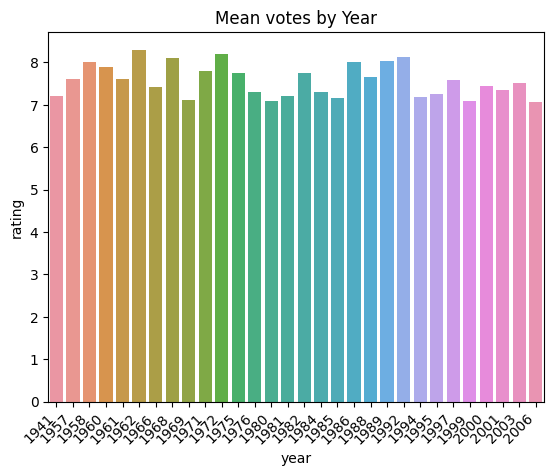

In [1285]:
df_rating = df.groupby('year')['rating'].mean().sort_values(ascending=False).head(30).to_frame().reset_index()
sns.barplot(x='year', y='rating', data=df_rating)
ax = plt.gca()
plt.xticks(rotation=45, ha='right')
plt.title('Mean votes by Year')

In [1286]:
df.head()

,movies,year,genre,rating,one-line,stars,votes,runtime,directors,starsonly,endyearseries
0,Blood Red Sky,2021,"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,\n Director:\nPeter Thorwarth\n| \n Star...,21062,121.0,\n –\nPeter Thorwarth\n| \n,"-Peri Baumeister, -Carl Anton Koch, -Alexander...",0
1,Masters of the Universe: Revelation,2021,"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,"\n \n Stars:\nChris Wood, \nSara...",17870,25.0,\n \n,"-Chris Wood, -Sarah Michelle Gellar, -Lena Hea...",0
2,The Walking Dead,2010,"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"\n \n Stars:\nAndrew Lincoln, \n...",885805,44.0,\n \n,"-Andrew Lincoln, -Norman Reedus, -Melissa McBr...",2022
3,Rick and Morty,2013,"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"\n \n Stars:\nJustin Roiland, \n...",414849,23.0,\n \n,"-Justin Roiland, -Chris Parnell, -Spencer Gram...",0
5,Outer Banks,2020,"Action, Crime, Drama",7.6,A group of teenagers from the wrong side of th...,"\n \n Stars:\nChase Stokes, \nMa...",25858,50.0,\n \n,"-Chase Stokes, -Madelyn Cline, -Madison Bailey...",0


In [1287]:
import re

In [1288]:
df.drop('stars', axis=1, inplace=False) 

,movies,year,genre,rating,one-line,votes,runtime,directors,starsonly,endyearseries
0,Blood Red Sky,2021,"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,21062,121.0,\n –\nPeter Thorwarth\n| \n,"-Peri Baumeister, -Carl Anton Koch, -Alexander...",0
1,Masters of the Universe: Revelation,2021,"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,17870,25.0,\n \n,"-Chris Wood, -Sarah Michelle Gellar, -Lena Hea...",0
2,The Walking Dead,2010,"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,885805,44.0,\n \n,"-Andrew Lincoln, -Norman Reedus, -Melissa McBr...",2022
3,Rick and Morty,2013,"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,414849,23.0,\n \n,"-Justin Roiland, -Chris Parnell, -Spencer Gram...",0
5,Outer Banks,2020,"Action, Crime, Drama",7.6,A group of teenagers from the wrong side of th...,25858,50.0,\n \n,"-Chase Stokes, -Madelyn Cline, -Madison Bailey...",0
...,...,...,...,...,...,...,...,...,...,...
9805,Katla,2021,"Drama, Mystery, Sci-Fi",7.5,"A year after Katla's eruption, the shattered s...",453,51.0,\n –\nBaltasar Kormákur\n| \n,"-Guðrún Ýr Eyfjörð, -Íris Tanja Flygenring, -I...",0
9814,This Is a Robbery: The World's Biggest Art Heist,2021,"Documentary, Crime, History",7.3,A museum guard buzzes in two men dressed as co...,175,53.0,\n –\nColin Barnicle\n| \n,"-Nancy Clougherty, -Justin Stratman, -Anne Haw...",0
9901,Modern Family,2009,"Comedy, Drama, Romance",8.2,"Jay must adapt to his young new wife, Gloria a...",3404,23.0,\n –\nJason Winer\n| \n,"-Ed O'Neill, -Sofía Vergara, -Julie Bowen, -Ty...",2020
9934,Master of None,2015,"Comedy, Drama",5.8,"Now a bestselling author, Denise leads a quiet...",1173,55.0,\n –\nAziz Ansari\n| \n,"-Naomi Ackie, -Lena Waithe, -Aziz Ansari, -Ays...",0


In [1289]:
df.index.duplicated().any()

False

In [1290]:
directors.index.duplicated().any()

False

In [1291]:
directors = directors.reset_index(drop=True)

In [1292]:
df['directors'] = directors.str.replace(r'\n', '-', regex=True)
df['directors'] = directors.str.replace(r'Director:', '', regex=True)
df['directors'] = directors.str.replace(r'Directors:', '', regex=True)
df['directors'] = directors.str.replace(r'|', '', regex=True)

In [1293]:
df['directors'] = df['directors'].fillna('Non noted')

In [1294]:
df

,movies,year,genre,rating,one-line,stars,votes,runtime,directors,starsonly,endyearseries
0,Blood Red Sky,2021,"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,\n Director:\nPeter Thorwarth\n| \n Star...,21062,121.0,Director:Peter Thorwarth|,"-Peri Baumeister, -Carl Anton Koch, -Alexander...",0
1,Masters of the Universe: Revelation,2021,"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,"\n \n Stars:\nChris Wood, \nSara...",17870,25.0,,"-Chris Wood, -Sarah Michelle Gellar, -Lena Hea...",0
2,The Walking Dead,2010,"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"\n \n Stars:\nAndrew Lincoln, \n...",885805,44.0,,"-Andrew Lincoln, -Norman Reedus, -Melissa McBr...",2022
3,Rick and Morty,2013,"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"\n \n Stars:\nJustin Roiland, \n...",414849,23.0,,"-Justin Roiland, -Chris Parnell, -Spencer Gram...",0
5,Outer Banks,2020,"Action, Crime, Drama",7.6,A group of teenagers from the wrong side of th...,"\n \n Stars:\nChase Stokes, \nMa...",25858,50.0,Director:Augustine Frizzell|,"-Chase Stokes, -Madelyn Cline, -Madison Bailey...",0
...,...,...,...,...,...,...,...,...,...,...,...
9805,Katla,2021,"Drama, Mystery, Sci-Fi",7.5,"A year after Katla's eruption, the shattered s...",\n Director:\nBaltasar Kormákur\n| \n St...,453,51.0,Non noted,"-Guðrún Ýr Eyfjörð, -Íris Tanja Flygenring, -I...",0
9814,This Is a Robbery: The World's Biggest Art Heist,2021,"Documentary, Crime, History",7.3,A museum guard buzzes in two men dressed as co...,\n Director:\nColin Barnicle\n| \n Stars...,175,53.0,Non noted,"-Nancy Clougherty, -Justin Stratman, -Anne Haw...",0
9901,Modern Family,2009,"Comedy, Drama, Romance",8.2,"Jay must adapt to his young new wife, Gloria a...",\n Director:\nJason Winer\n| \n Stars:\n...,3404,23.0,Non noted,"-Ed O'Neill, -Sofía Vergara, -Julie Bowen, -Ty...",2020
9934,Master of None,2015,"Comedy, Drama",5.8,"Now a bestselling author, Denise leads a quiet...",\n Director:\nAziz Ansari\n| \n Stars:\n...,1173,55.0,Non noted,"-Naomi Ackie, -Lena Waithe, -Aziz Ansari, -Ays...",0


In [1295]:
df.groupby('directors')['rating'].mean().sort_values(ascending = True)

directors
 Kris Pearn|                            1.1
 Jim Hare|                              1.8
    Director:Michael Bonfiglio|         2.0
 Joe Layton|                            2.1
    Director:Tarun Mansukhani|          2.2
                                       ... 
    Director:Henry Hobson|              9.1
    Director:J.W. Myers|                9.1
    Director:Gregg Champion|            9.1
    Director:Manjari Makijany|          9.2
    Director:Paul Tanter|               9.2
Name: rating, Length: 2827, dtype: float64

Text(0.5, 1.0, 'Bottom Average Rating by Director')

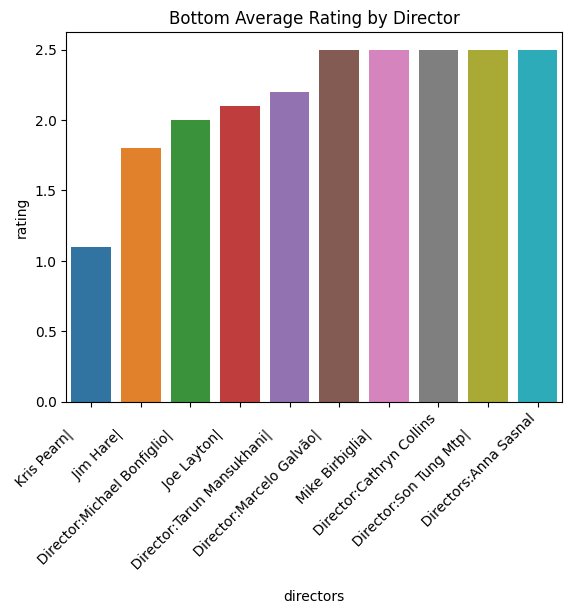

In [1296]:
df_bdirector = df.groupby('directors')['rating'].mean().sort_values(ascending=True).head(10).to_frame().reset_index()
sns.barplot(x='directors', y='rating', data=df_bdirector)
ax = plt.gca()
plt.xticks(rotation=45, ha='right')
plt.title('Bottom Average Rating by Director')

In [1297]:
df.groupby('directors')['rating'].mean().sort_values(ascending = False)

directors
    Director:Manjari Makijany|          9.2
    Director:Paul Tanter|               9.2
    Director:Gregg Champion|            9.1
    Director:J.W. Myers|                9.1
    Director:Henry Hobson|              9.1
                                       ... 
    Director:Tarun Mansukhani|          2.2
 Joe Layton|                            2.1
    Director:Michael Bonfiglio|         2.0
 Jim Hare|                              1.8
 Kris Pearn|                            1.1
Name: rating, Length: 2827, dtype: float64

Text(0.5, 1.0, 'Top Average Rating by Director')

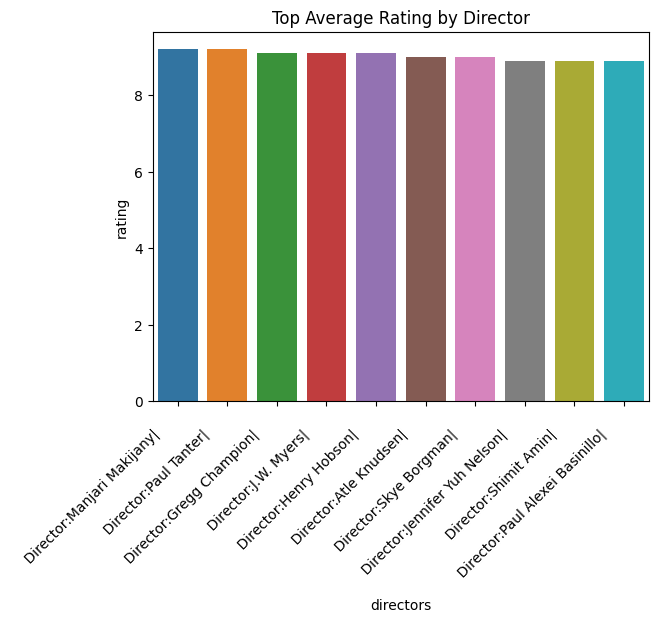

In [1298]:
df_director = df.groupby('directors')['rating'].mean().sort_values(ascending=False).head(10).to_frame().reset_index()
sns.barplot(x='directors', y='rating', data=df_director)
ax = plt.gca()
plt.xticks(rotation=45, ha='right')
plt.title('Top Average Rating by Director')

In [1299]:
#Top 10 longest movies, title and runtime
top10series = df.nlargest(10, 'runtime')[['movies', 'runtime']].set_index('movies')
top10series 

,runtime
movies,
El tiempo entre costuras,853.0
Soupçons,629.0
The Innocence Files,573.0
The Haunting of Hill House,572.0
Cosmos: A Spacetime Odyssey,557.0
Dogs of Berlin,542.0
Away,498.0
The Haunting of Bly Manor,494.0
The Last Dance,491.0


<Axes: xlabel='runtime', ylabel='movies'>

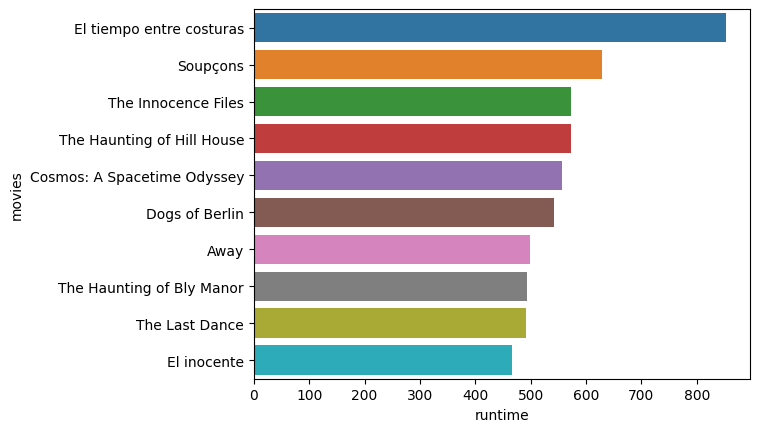

In [1300]:
sns.barplot(x='runtime', y=top10series.index,data=top10series)

In [1301]:
top10series = df.nlargest(10, 'runtime')[['movies', 'runtime']].set_index('movies')
top10series 

,runtime
movies,
El tiempo entre costuras,853.0
Soupçons,629.0
The Innocence Files,573.0
The Haunting of Hill House,572.0
Cosmos: A Spacetime Odyssey,557.0
Dogs of Berlin,542.0
Away,498.0
The Haunting of Bly Manor,494.0
The Last Dance,491.0


In [1302]:
dfi = (df.groupby('year')['movies'].count()
        .sort_values(ascending=False)
        .head(10)
)
dfi

year
2018    693
2019    681
2020    678
2017    577
2016    479
2015    342
2021    302
2014    272
2013    235
2012    159
Name: movies, dtype: int64

In [1303]:
dfi = (df.groupby('year')['movies'].size()
        .to_frame(name='count')  # Create a DataFrame
        .reset_index()  # Make 'year' a column
        .sort_values(by='count', ascending=False)  # Sort by 'count' column
        .head(10)
)
dfi

,year,count
72,2018,693
73,2019,681
74,2020,678
71,2017,577
70,2016,479
69,2015,342
75,2021,302
68,2014,272
67,2013,235
66,2012,159


Text(0.5, 1.0, 'Top 10 counts of Movies released by Year')

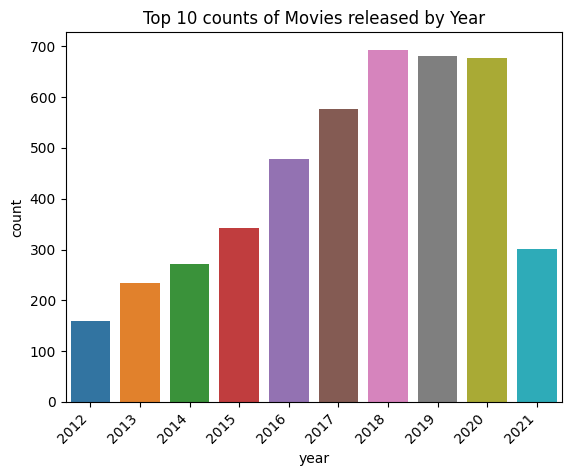

In [1304]:
sns.barplot(x='year', y='count', data=dfi)
ax = plt.gca()
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 counts of Movies released by Year')

In [1305]:
top5movie= df.nlargest(5, 'rating')[['movies','year', 'rating', 'directors']].set_index('movies')
top5movie

,year,rating,directors
movies,,,
Breaking Bad,2008,9.4,
Avatar: The Last Airbender,2005,9.3,
Cosmos: A Spacetime Odyssey,2014,9.3,
Our Planet,2019,9.3,Director:Leigh Janiak|
Rick and Morty,2013,9.2,


In [1323]:
top5movie= df.nlargest(5, 'rating')[['movies','year', 'rating', 'directors']].set_index('movies')
missing_directors = top5movie[top5movie['directors'].isnull()]
missing_directors 

,year,rating,directors
movies,,,


In [1337]:
df[df['movies'] == 'Avatar: The Last Airbender']
df.loc[129, 'directors'] = 'Michael Dante DiMartino, Bryan Konietzko '
df

,movies,year,genre,rating,one-line,stars,votes,runtime,directors,starsonly,endyearseries
0,Blood Red Sky,2021,"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,\n Director:\nPeter Thorwarth\n| \n Star...,21062,121.0,Director:Peter Thorwarth|,"-Peri Baumeister, -Carl Anton Koch, -Alexander...",0
1,Masters of the Universe: Revelation,2021,"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,"\n \n Stars:\nChris Wood, \nSara...",17870,25.0,,"-Chris Wood, -Sarah Michelle Gellar, -Lena Hea...",0
2,The Walking Dead,2010,"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"\n \n Stars:\nAndrew Lincoln, \n...",885805,44.0,,"-Andrew Lincoln, -Norman Reedus, -Melissa McBr...",2022
3,Rick and Morty,2013,"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"\n \n Stars:\nJustin Roiland, \n...",414849,23.0,,"-Justin Roiland, -Chris Parnell, -Spencer Gram...",0
5,Outer Banks,2020,"Action, Crime, Drama",7.6,A group of teenagers from the wrong side of th...,"\n \n Stars:\nChase Stokes, \nMa...",25858,50.0,Director:Augustine Frizzell|,"-Chase Stokes, -Madelyn Cline, -Madison Bailey...",0
...,...,...,...,...,...,...,...,...,...,...,...
9805,Katla,2021,"Drama, Mystery, Sci-Fi",7.5,"A year after Katla's eruption, the shattered s...",\n Director:\nBaltasar Kormákur\n| \n St...,453,51.0,Non noted,"-Guðrún Ýr Eyfjörð, -Íris Tanja Flygenring, -I...",0
9814,This Is a Robbery: The World's Biggest Art Heist,2021,"Documentary, Crime, History",7.3,A museum guard buzzes in two men dressed as co...,\n Director:\nColin Barnicle\n| \n Stars...,175,53.0,Non noted,"-Nancy Clougherty, -Justin Stratman, -Anne Haw...",0
9901,Modern Family,2009,"Comedy, Drama, Romance",8.2,"Jay must adapt to his young new wife, Gloria a...",\n Director:\nJason Winer\n| \n Stars:\n...,3404,23.0,Non noted,"-Ed O'Neill, -Sofía Vergara, -Julie Bowen, -Ty...",2020
9934,Master of None,2015,"Comedy, Drama",5.8,"Now a bestselling author, Denise leads a quiet...",\n Director:\nAziz Ansari\n| \n Stars:\n...,1173,55.0,Non noted,"-Naomi Ackie, -Lena Waithe, -Aziz Ansari, -Ays...",0


In [1341]:
df[df['movies'] == 'Cosmos: A Spacetime Odyssey']
df.loc[820, 'directors'] = 'Ann Druyan, Brannon Braga'
df

,movies,year,genre,rating,one-line,stars,votes,runtime,directors,starsonly,endyearseries
0,Blood Red Sky,2021,"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,\n Director:\nPeter Thorwarth\n| \n Star...,21062,121.0,Director:Peter Thorwarth|,"-Peri Baumeister, -Carl Anton Koch, -Alexander...",0
1,Masters of the Universe: Revelation,2021,"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,"\n \n Stars:\nChris Wood, \nSara...",17870,25.0,,"-Chris Wood, -Sarah Michelle Gellar, -Lena Hea...",0
2,The Walking Dead,2010,"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"\n \n Stars:\nAndrew Lincoln, \n...",885805,44.0,,"-Andrew Lincoln, -Norman Reedus, -Melissa McBr...",2022
3,Rick and Morty,2013,"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"\n \n Stars:\nJustin Roiland, \n...",414849,23.0,,"-Justin Roiland, -Chris Parnell, -Spencer Gram...",0
5,Outer Banks,2020,"Action, Crime, Drama",7.6,A group of teenagers from the wrong side of th...,"\n \n Stars:\nChase Stokes, \nMa...",25858,50.0,Director:Augustine Frizzell|,"-Chase Stokes, -Madelyn Cline, -Madison Bailey...",0
...,...,...,...,...,...,...,...,...,...,...,...
9805,Katla,2021,"Drama, Mystery, Sci-Fi",7.5,"A year after Katla's eruption, the shattered s...",\n Director:\nBaltasar Kormákur\n| \n St...,453,51.0,Non noted,"-Guðrún Ýr Eyfjörð, -Íris Tanja Flygenring, -I...",0
9814,This Is a Robbery: The World's Biggest Art Heist,2021,"Documentary, Crime, History",7.3,A museum guard buzzes in two men dressed as co...,\n Director:\nColin Barnicle\n| \n Stars...,175,53.0,Non noted,"-Nancy Clougherty, -Justin Stratman, -Anne Haw...",0
9901,Modern Family,2009,"Comedy, Drama, Romance",8.2,"Jay must adapt to his young new wife, Gloria a...",\n Director:\nJason Winer\n| \n Stars:\n...,3404,23.0,Non noted,"-Ed O'Neill, -Sofía Vergara, -Julie Bowen, -Ty...",2020
9934,Master of None,2015,"Comedy, Drama",5.8,"Now a bestselling author, Denise leads a quiet...",\n Director:\nAziz Ansari\n| \n Stars:\n...,1173,55.0,Non noted,"-Naomi Ackie, -Lena Waithe, -Aziz Ansari, -Ays...",0


In [1344]:
df[df['movies'] == 'Rick and Morty']
df.loc[3, 'directors'] = 'Pete Michels'
df

,movies,year,genre,rating,one-line,stars,votes,runtime,directors,starsonly,endyearseries
0,Blood Red Sky,2021,"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,\n Director:\nPeter Thorwarth\n| \n Star...,21062,121.0,Director:Peter Thorwarth|,"-Peri Baumeister, -Carl Anton Koch, -Alexander...",0
1,Masters of the Universe: Revelation,2021,"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,"\n \n Stars:\nChris Wood, \nSara...",17870,25.0,,"-Chris Wood, -Sarah Michelle Gellar, -Lena Hea...",0
2,The Walking Dead,2010,"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"\n \n Stars:\nAndrew Lincoln, \n...",885805,44.0,,"-Andrew Lincoln, -Norman Reedus, -Melissa McBr...",2022
3,Rick and Morty,2013,"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"\n \n Stars:\nJustin Roiland, \n...",414849,23.0,Pete Michels,"-Justin Roiland, -Chris Parnell, -Spencer Gram...",0
5,Outer Banks,2020,"Action, Crime, Drama",7.6,A group of teenagers from the wrong side of th...,"\n \n Stars:\nChase Stokes, \nMa...",25858,50.0,Director:Augustine Frizzell|,"-Chase Stokes, -Madelyn Cline, -Madison Bailey...",0
...,...,...,...,...,...,...,...,...,...,...,...
9805,Katla,2021,"Drama, Mystery, Sci-Fi",7.5,"A year after Katla's eruption, the shattered s...",\n Director:\nBaltasar Kormákur\n| \n St...,453,51.0,Non noted,"-Guðrún Ýr Eyfjörð, -Íris Tanja Flygenring, -I...",0
9814,This Is a Robbery: The World's Biggest Art Heist,2021,"Documentary, Crime, History",7.3,A museum guard buzzes in two men dressed as co...,\n Director:\nColin Barnicle\n| \n Stars...,175,53.0,Non noted,"-Nancy Clougherty, -Justin Stratman, -Anne Haw...",0
9901,Modern Family,2009,"Comedy, Drama, Romance",8.2,"Jay must adapt to his young new wife, Gloria a...",\n Director:\nJason Winer\n| \n Stars:\n...,3404,23.0,Non noted,"-Ed O'Neill, -Sofía Vergara, -Julie Bowen, -Ty...",2020
9934,Master of None,2015,"Comedy, Drama",5.8,"Now a bestselling author, Denise leads a quiet...",\n Director:\nAziz Ansari\n| \n Stars:\n...,1173,55.0,Non noted,"-Naomi Ackie, -Lena Waithe, -Aziz Ansari, -Ays...",0


In [1351]:
df[df['movies'] == 'Our Planet']

,movies,year,genre,rating,one-line,stars,votes,runtime,directors,starsonly,endyearseries
1184,Our Planet,2019,Documentary,9.3,Documentary series focusing on the breadth of ...,\n \n Star:\nDavid Attenborough\n,36473,403.0,Director:Leigh Janiak|,:-David Attenborough-,0


In [1352]:
df.loc[1184, 'directors'] = 'Leigh Janiak'
df

,movies,year,genre,rating,one-line,stars,votes,runtime,directors,starsonly,endyearseries
0,Blood Red Sky,2021,"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,\n Director:\nPeter Thorwarth\n| \n Star...,21062,121.0,Director:Peter Thorwarth|,"-Peri Baumeister, -Carl Anton Koch, -Alexander...",0
1,Masters of the Universe: Revelation,2021,"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,"\n \n Stars:\nChris Wood, \nSara...",17870,25.0,,"-Chris Wood, -Sarah Michelle Gellar, -Lena Hea...",0
2,The Walking Dead,2010,"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"\n \n Stars:\nAndrew Lincoln, \n...",885805,44.0,,"-Andrew Lincoln, -Norman Reedus, -Melissa McBr...",2022
3,Rick and Morty,2013,"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"\n \n Stars:\nJustin Roiland, \n...",414849,23.0,Pete Michels,"-Justin Roiland, -Chris Parnell, -Spencer Gram...",0
5,Outer Banks,2020,"Action, Crime, Drama",7.6,A group of teenagers from the wrong side of th...,"\n \n Stars:\nChase Stokes, \nMa...",25858,50.0,Director:Augustine Frizzell|,"-Chase Stokes, -Madelyn Cline, -Madison Bailey...",0
...,...,...,...,...,...,...,...,...,...,...,...
9805,Katla,2021,"Drama, Mystery, Sci-Fi",7.5,"A year after Katla's eruption, the shattered s...",\n Director:\nBaltasar Kormákur\n| \n St...,453,51.0,Non noted,"-Guðrún Ýr Eyfjörð, -Íris Tanja Flygenring, -I...",0
9814,This Is a Robbery: The World's Biggest Art Heist,2021,"Documentary, Crime, History",7.3,A museum guard buzzes in two men dressed as co...,\n Director:\nColin Barnicle\n| \n Stars...,175,53.0,Non noted,"-Nancy Clougherty, -Justin Stratman, -Anne Haw...",0
9901,Modern Family,2009,"Comedy, Drama, Romance",8.2,"Jay must adapt to his young new wife, Gloria a...",\n Director:\nJason Winer\n| \n Stars:\n...,3404,23.0,Non noted,"-Ed O'Neill, -Sofía Vergara, -Julie Bowen, -Ty...",2020
9934,Master of None,2015,"Comedy, Drama",5.8,"Now a bestselling author, Denise leads a quiet...",\n Director:\nAziz Ansari\n| \n Stars:\n...,1173,55.0,Non noted,"-Naomi Ackie, -Lena Waithe, -Aziz Ansari, -Ays...",0


In [1353]:
top5movie= df.nlargest(5, 'rating')[['movies','rating', 'directors']].set_index('movies')
top5movie

,rating,directors
movies,,
Breaking Bad,9.4,Vince Gilligan
Avatar: The Last Airbender,9.3,"Michael Dante DiMartino, Bryan Konietzko"
Cosmos: A Spacetime Odyssey,9.3,"Ann Druyan, Brannon Braga"
Our Planet,9.3,Leigh Janiak
Rick and Morty,9.2,Pete Michels


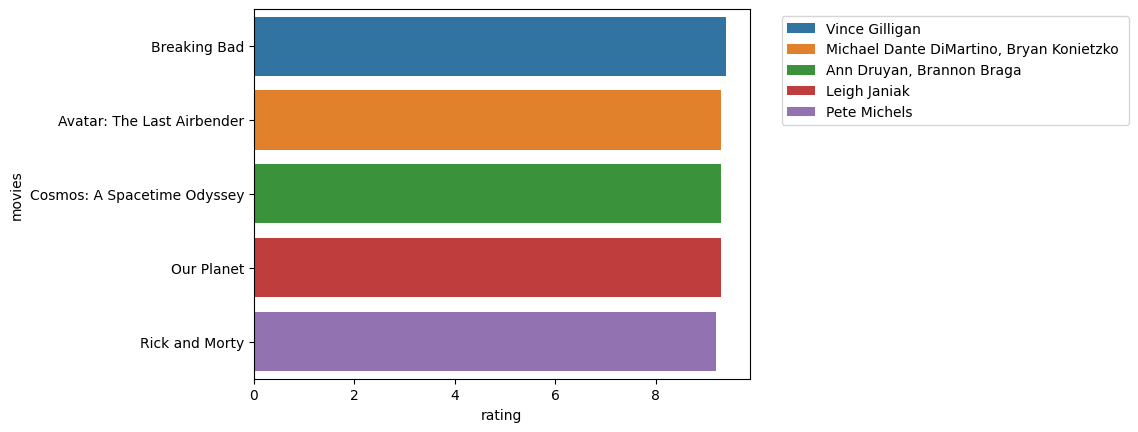

In [1354]:
sns.barplot(x='rating', y=top5movie.index, data=top5movie, hue='directors',
           dodge = False)

plt.legend(bbox_to_anchor=(1.05,1),loc=2)

In [1375]:
grouped_data = df.groupby('year')['rating'].mean().sort_values(ascending=False).head(10)
grouped_data

year
1962    8.300000
1972    8.200000
1992    8.120000
1968    8.100000
1989    8.033333
1986    8.000000
1958    8.000000
1960    7.900000
1971    7.800000
1975    7.760000
Name: rating, dtype: float64

<Axes: xlabel='year'>

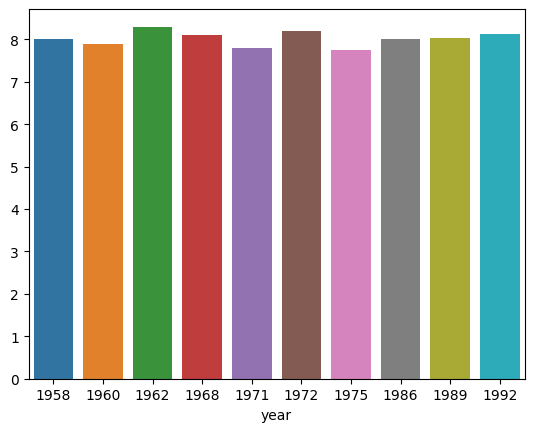

In [1376]:
sns.barplot(x=grouped_data.index, y=grouped_data.values)

In [1377]:
df.columns

Index(['movies', 'year', 'genre', 'rating', 'one-line', 'stars', 'votes',
       'runtime', 'directors', 'starsonly', 'endyearseries'],
      dtype='object')

In [1386]:
#creating user defined function
def rating(rating):
    if rating >= 7.0:
        return 'Excellent'
    elif rating >= 6.0:
        return 'OK'
    else:
        return 'Average'

In [1388]:
df['ratings_category'] = df['rating'].apply(rating)

In [1394]:
df[df['genre'].str.contains('Drama',case=True)]

,movies,year,genre,rating,one-line,stars,votes,runtime,directors,starsonly,endyearseries,ratings_category
2,The Walking Dead,2010,"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"\n \n Stars:\nAndrew Lincoln, \n...",885805,44.0,,"-Andrew Lincoln, -Norman Reedus, -Melissa McBr...",2022,Excellent
5,Outer Banks,2020,"Action, Crime, Drama",7.6,A group of teenagers from the wrong side of th...,"\n \n Stars:\nChase Stokes, \nMa...",25858,50.0,Director:Augustine Frizzell|,"-Chase Stokes, -Madelyn Cline, -Madison Bailey...",0,Excellent
6,The Last Letter from Your Lover,2021,"Drama, Romance",6.8,A pair of interwoven stories set in the past a...,\n Director:\nAugustine Frizzell\n| \n S...,5283,110.0,,"-Shailene Woodley, -Joe Alwyn, -Wendy Nottingh...",0,OK
7,Dexter,2006,"Crime, Drama, Mystery",8.6,"By day, mild-mannered Dexter is a blood-spatte...","\n \n Stars:\nMichael C. Hall, \...",665387,53.0,,"-Michael C. Hall, -Jennifer Carpenter, -David ...",2013,Excellent
9,Virgin River,2019,"Drama, Romance",7.4,"Seeking a fresh start, nurse practitioner Meli...",\n \n Stars:\nAlexandra Breckenr...,27279,44.0,Director:Navot Papushado|,"-Alexandra Breckenridge, -Martin Henderson, -C...",0,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...
9401,Generazione 56K,2021,"Comedy, Drama, Romance",7.8,Daniel finally clicks with a woman he met thro...,\n \n Stars:\nAngelo Spagnoletti...,45,33.0,Non noted,"-Angelo Spagnoletti, -Cristina Cappelli, -Alfr...",0,Excellent
9805,Katla,2021,"Drama, Mystery, Sci-Fi",7.5,"A year after Katla's eruption, the shattered s...",\n Director:\nBaltasar Kormákur\n| \n St...,453,51.0,Non noted,"-Guðrún Ýr Eyfjörð, -Íris Tanja Flygenring, -I...",0,Excellent
9901,Modern Family,2009,"Comedy, Drama, Romance",8.2,"Jay must adapt to his young new wife, Gloria a...",\n Director:\nJason Winer\n| \n Stars:\n...,3404,23.0,Non noted,"-Ed O'Neill, -Sofía Vergara, -Julie Bowen, -Ty...",2020,Excellent
9934,Master of None,2015,"Comedy, Drama",5.8,"Now a bestselling author, Denise leads a quiet...",\n Director:\nAziz Ansari\n| \n Stars:\n...,1173,55.0,Non noted,"-Naomi Ackie, -Lena Waithe, -Aziz Ansari, -Ays...",0,Average


In [1397]:
print('This dataset contains', len(df[df['genre'].str.contains('Drama', case=True)]), 'Drama movies.')


This dataset contains 2179 Drama movies.


In [1399]:
#find unique values from columns:
df['genre']

0           Action, Horror, Thriller            
1       Animation, Action, Adventure            
2            Drama, Horror, Thriller            
3       Animation, Adventure, Comedy            
5               Action, Crime, Drama            
                          ...                   
9805          Drama, Mystery, Sci-Fi            
9814     Documentary, Crime, History            
9901          Comedy, Drama, Romance            
9934                   Comedy, Drama            
9956                   Comedy, Drama            
Name: genre, Length: 5155, dtype: object

In [1401]:
list1=[]
for value in df ['genre']:
    list1.append(value.split(','))

In [1432]:
list1

[['Action', ' Horror', ' Thriller            '],
 ['Animation', ' Action', ' Adventure            '],
 ['Drama', ' Horror', ' Thriller            '],
 ['Animation', ' Adventure', ' Comedy            '],
 ['Action', ' Crime', ' Drama            '],
 ['Drama', ' Romance            '],
 ['Crime', ' Drama', ' Mystery            '],
 ['Comedy            '],
 ['Drama', ' Romance            '],
 ['Action', ' Adventure', ' Thriller            '],
 ['Crime', ' Drama', ' Fantasy            '],
 ['Drama', ' Horror', ' Mystery            '],
 ['Drama', ' Horror', ' Thriller            '],
 ['Drama', ' Romance            '],
 ['Crime', ' Drama', ' Thriller            '],
 ['Drama            '],
 ['Comedy', ' Drama            '],
 ['Drama', ' Fantasy', ' Horror            '],
 ['Drama', ' Horror', ' Mystery            '],
 ['Comedy', ' Romance            '],
 ['Action', ' Adventure', ' Drama            '],
 ['Crime', ' Drama            '],
 ['Drama', ' History', ' Romance            '],
 ['Action', 

In [1433]:
flat_list = [item.strip() for sublist in list1 for item in sublist]  # Strip leading/trailing spaces
unique_values_count = len(set(flat_list))

In [1441]:
from collections import Counter

unique_counts = Counter(flat_list)  # Create a Counter object
print("List of unique genres and counts:")
for genre, count in unique_counts.items():
    print(genre, count)
    

List of unique genres and their counts:
Action 950
Horror 350
Thriller 534
Animation 657
Adventure 634
Drama 2179
Comedy 1689
Crime 797
Romance 553
Mystery 378
Fantasy 283
History 183
Sci-Fi 171
Biography 232
Family 248
Documentary 819
Music 138
Sport 99
Short 142
Game-Show 25
Reality-TV 104
Musical 34
War 44
Western 20
Film-Noir 11
Talk-Show 15
News 16


In [1461]:
unique_counts_df = pd.DataFrame.from_dict(unique_counts, orient='index', columns=['count'])
unique_counts_df.index.name = 'genre'
unique_counts_df 

,count
genre,
Action,950
Horror,350
Thriller,534
Animation,657
Adventure,634
Drama,2179
Comedy,1689
Crime,797
Romance,553


Text(0.5, 1.0, 'Count of Films by Genre')

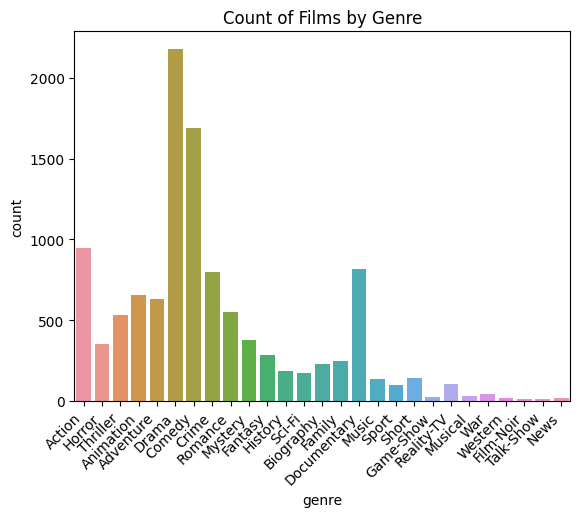

In [1463]:
#Bar chart creation:
sns.barplot(x=unique_counts_df.index, y='count', data=unique_counts_df)
ax = plt.gca()
plt.xticks(rotation=45, ha='right')
plt.title('Count of Films by Genre')

In [1434]:
unique_values_count = len(set(flat_list))  # Convert to a set to eliminate duplicates, preserving case
print("Number of unique genres (case-sensitive):", unique_values_count)

Number of unique genres (case-sensitive): 27


In [1435]:
unique_values_count_case_insensitive = len({genre.lower() for genre in flat_list})  # Convert to lowercase for case-insensitive counting
print("Number of unique genres (case-insensitive):", unique_values_count_case_insensitive)

Number of unique genres (case-insensitive): 27


In [1517]:
df['starsonly']

0       True
1       True
2       True
3       True
5       True
        ... 
9805    True
9814    True
9901    True
9934    True
9956    True
Name: starsonly, Length: 5155, dtype: bool

In [1631]:
list2 = []
for value in df['starsonly']:
    if value is not None and value.strip():  
        list2.append(value.strip().split(',')) 

In [1633]:
df['starsonly'].fillna('', inplace=True)  # Replace None with empty strings
list2 = [value.split(',') for value in df['starsonly']]

In [1634]:
df['starsonly'] = df['starsonly'].astype(str)

In [1635]:
list2

[['-Peri Baumeister',
  ' -Carl Anton Koch',
  ' -Alexander Scheer',
  ' -Kais Setti-'],
 ['-Chris Wood', ' -Sarah Michelle Gellar', ' -Lena Headey', ' -Mark Hamill-'],
 ['-Andrew Lincoln',
  ' -Norman Reedus',
  ' -Melissa McBride',
  ' -Lauren Cohan-'],
 ['-Justin Roiland',
  ' -Chris Parnell',
  ' -Spencer Grammer',
  ' -Sarah Chalke-'],
 ['-Chase Stokes',
  ' -Madelyn Cline',
  ' -Madison Bailey',
  ' -Jonathan Daviss-'],
 ['-Shailene Woodley',
  ' -Joe Alwyn',
  ' -Wendy Nottingham',
  ' -Felicity Jones-'],
 ['-Michael C. Hall',
  ' -Jennifer Carpenter',
  ' -David Zayas',
  ' -James Remar-'],
 ['-Maitreyi Ramakrishnan',
  ' -Poorna Jagannathan',
  ' -Darren Barnet',
  ' -John McEnroe-'],
 ['-Alexandra Breckenridge',
  ' -Martin Henderson',
  ' -Colin Lawrence',
  ' -Tim Matheson-'],
 ['-Karen Gillan', ' -Lena Headey', ' -Carla Gugino', ' -Michelle Yeoh-'],
 ['-Tom Ellis', ' -Lesley-Ann Brandt', ' -Lauren German', ' -D.B. Woodside-'],
 ['-Kiana Madeira',
  ' -Olivia Scott Welch',


In [1636]:
one_d=[]
for item in list2:
        for item1 in item:
             one_d.append(item1)

In [1637]:
one_d

['-Peri Baumeister',
 ' -Carl Anton Koch',
 ' -Alexander Scheer',
 ' -Kais Setti-',
 '-Chris Wood',
 ' -Sarah Michelle Gellar',
 ' -Lena Headey',
 ' -Mark Hamill-',
 '-Andrew Lincoln',
 ' -Norman Reedus',
 ' -Melissa McBride',
 ' -Lauren Cohan-',
 '-Justin Roiland',
 ' -Chris Parnell',
 ' -Spencer Grammer',
 ' -Sarah Chalke-',
 '-Chase Stokes',
 ' -Madelyn Cline',
 ' -Madison Bailey',
 ' -Jonathan Daviss-',
 '-Shailene Woodley',
 ' -Joe Alwyn',
 ' -Wendy Nottingham',
 ' -Felicity Jones-',
 '-Michael C. Hall',
 ' -Jennifer Carpenter',
 ' -David Zayas',
 ' -James Remar-',
 '-Maitreyi Ramakrishnan',
 ' -Poorna Jagannathan',
 ' -Darren Barnet',
 ' -John McEnroe-',
 '-Alexandra Breckenridge',
 ' -Martin Henderson',
 ' -Colin Lawrence',
 ' -Tim Matheson-',
 '-Karen Gillan',
 ' -Lena Headey',
 ' -Carla Gugino',
 ' -Michelle Yeoh-',
 '-Tom Ellis',
 ' -Lesley-Ann Brandt',
 ' -Lauren German',
 ' -D.B. Woodside-',
 '-Kiana Madeira',
 ' -Olivia Scott Welch',
 ' -Benjamin Flores Jr.',
 ' -Julia Reh

In [1638]:
flat_list = [item.strip() for sublist in list2 for item in sublist] # Strip leading/trailing spaces
unique_star_values_count = len(set(flat_list))

In [1639]:
from collections import Counter

unique_star_values_count = Counter(flat_list)  # Create a Counter object
print("List of unique genres and counts:")
for star, count in unique_star_values_count.items():
    print(star, count)
    

List of unique genres and counts:
-Peri Baumeister 2
-Carl Anton Koch 1
-Alexander Scheer 1
-Kais Setti- 1
-Chris Wood 1
-Sarah Michelle Gellar 1
-Lena Headey 4
-Mark Hamill- 1
-Andrew Lincoln 2
-Norman Reedus 1
-Melissa McBride 1
-Lauren Cohan- 1
-Justin Roiland 2
-Chris Parnell 3
-Spencer Grammer 2
-Sarah Chalke- 2
-Chase Stokes 2
-Madelyn Cline 2
-Madison Bailey 2
-Jonathan Daviss- 2
-Shailene Woodley 2
-Joe Alwyn 1
-Wendy Nottingham 1
-Felicity Jones- 1
-Michael C. Hall 4
-Jennifer Carpenter 3
-David Zayas 2
-James Remar- 3
-Maitreyi Ramakrishnan 2
-Poorna Jagannathan 1
-Darren Barnet 1
-John McEnroe- 1
-Alexandra Breckenridge 2
-Martin Henderson 2
-Colin Lawrence 2
-Tim Matheson- 1
-Karen Gillan 2
-Carla Gugino 3
-Michelle Yeoh- 2
-Tom Ellis 2
-Lesley-Ann Brandt 1
-Lauren German 2
-D.B. Woodside- 2
-Kiana Madeira 4
-Olivia Scott Welch 1
-Benjamin Flores Jr. 2
-Julia Rehwald- 1
-Lady Gaga 1
-Kathy Bates 5
-Angela Bassett 2
-Sarah Paulson- 3
-Ellen Pompeo 1
-Chandra Wilson 1
-James 

In [1640]:
#tuple
top_10_stars = unique_star_values_count.most_common(11)
top_10_stars 

[('', 88),
 ('-Jakob Eklund', 18),
 ('-Johnny Yong Bosch', 13),
 ('-Kana Hanazawa', 13),
 ('-John Cleese', 12),
 ('-Liam Neeson', 11),
 ('-Adam Sandler', 11),
 ('-John Paul Tremblay', 11),
 ('-Robb Wells', 11),
 ('-Mario Casas', 10),
 ('-Bruce Willis', 10)]

In [1641]:
#extract tuple:
stars = [item[0] for item in top_10_stars] 
counts = [item[1] for item in top_10_stars] 

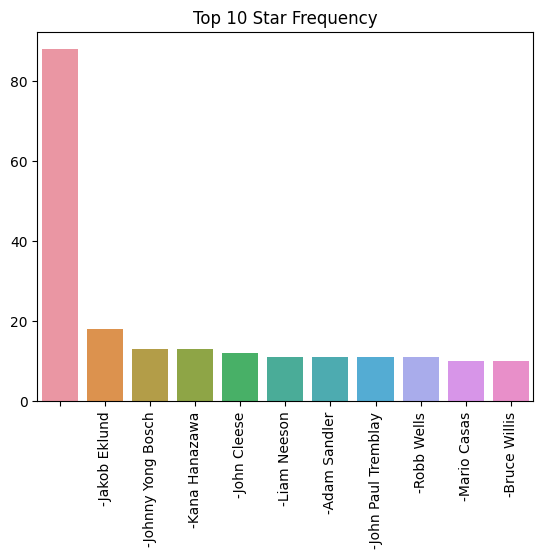

In [1642]:
sns.barplot(x=stars, y=counts)
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.title("Top 10 Star Frequency")
plt.show()

Challenge: For future data: Dealing efficiently with empty strings.